In [2]:
# Manipulación de datos
import pandas as pd
# Operaciones numéricas
import numpy as np
# Para medición del tiempo que toma ejecutar los procesos
from time import time
# Para separar datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librería para SVM
from sklearn.svm import SVC
# Medición de precisión
from sklearn.metrics import accuracy_score, confusion_matrix
# Generar gráficos
import matplotlib.pyplot as plt

In [3]:
# Leemos el set de datos y lo cargamos en la variable df, que es un DataFrame de pandas
trans_df = pd.read_csv("card_transdata.csv")
# Mostrar información sobre el set de datos
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


Siempre es recomendable explorar el set de datos antes de realizar un análisis sobre el mismo. En este caso, simplemente mostraremos los primeros cinco registros para conocer cómo se componen.

In [5]:
trans_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


El objetivo será predecir la columna `fraud`, que contiene el resultado de la transacción.

In [6]:
# Contar los valores únicos de una columna en un DataFrame
trans_df['fraud'].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

Para empezar el proceso de entrenamiento, es necesario separar las características (`X`) de las etiquetas (`y`). El objetivo de todo el análisis es poder predecir una etiqueta `y`, contando únicamente con las características (`y`). La SVM se encargará de aprender la relación que existe entre `X` y `y`.

In [7]:
# Crearemos un nuevo df llamado X con las columnas de características
# Se obtiene generando una lista de columnas del df a utilizar
lista_caract = [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price',
    'repeat_retailer',
    'used_chip',
    'used_pin_number',
    'online_order'
]
# Luego tomando esa lista del df original
X = trans_df[lista_caract]
# Mostraremos los primeros cinco registros para conocer cómo se compone X
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [8]:
# Utilizaremos el mismo procedimiento para generar y
lista_etiq = ['fraud']
y = trans_df[lista_etiq]
y.head()

,fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


Ahora que tenemos nuestros objetos de `X` y `y`, procederemos a separarlos en conjuntos de **entrenamiento** (que serviran para aprender) y **prueba** (para validadr que el aprendizaje sea correcto).

Este proceso será realizado con la función `train_test_split` que importamos al inicio del documento. Por defecto, esta función tomará 25% (`0.25`) de nuestro conjunto total de datos como prueba y el resto para entrenamiento.

In [10]:
# Separar en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y
)

In [11]:
# Mostraremos la cantidad de datos a utilizar para el entrenamiento
X_train.shape

(750000, 7)

In [12]:
y_train.shape

(750000, 1)

In [13]:
# Luego, la cantidad de datos a utilizar para validar
X_test.shape

(250000, 7)

In [14]:
y_test.shape

(250000, 1)

### Creación de la SVM

Utilizaremos la clase `SVC` (Support Vector Classifier) que importamos al inicio. En este caso tomaremos un kernel **lineal** (en sklearn `linear`) para que el entrenamiento sea rápido.

In [15]:
# Definición del modelo que llamaremos clf
clf = SVC(kernel='linear')

El entrenamiento de un modelo en sklearn es bastante sencillo. Basta con llamar el método `fit` para encontrar las relaciones entre nuestra `X` y `y`. El único inconveniente es que el método `fit` recibe valores de tipo `array`, pero nuestros datos actualmente se encuentran contenidos en objetos de tipo `pandas.DataFrame` (df). Para convertir un df en un array, basta con tomar el atributo `values` del mismo df.

In [16]:
# Guardamos el registro del momento en el que empezamos el entrenamiento
hora_inicio = time()

# Iniciamos el entrenamiento ejecutando el metodo fit
# Los valores que enviamos son los valores de X y y
#
# El .ravel() que final de y.values es un pequeño truco para cambiar su forma
# esto permite convertir una matriz de dos dimensiones en una sola dimesión,
# con ello, cada elemento de esta nueva matriz corresponde a un registro de X
clf.fit(X_train.values, y_train.values.ravel())

# Imprimimos el tiempo tomado para el entrenamiento
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 89926.82014894485 segundos


Una vez terminado el entrenamiento, es necesario medir su precisión. Para ello, intentaremos predecir los datos de nuestra `y` de prueba utilizando nuestra `X` de prueba. A estos datos les llamaremos `y_pred`, pues contendrán nuestra predicción.

In [17]:
# Otra vez guardaremos registro del tiempo que nos toma crear esta predicción
hora_inicio = time()
# Iniciamos la predicción con nuestra X de prueba
y_pred = clf.predict(X_test)
# Mostramos el tiempo tomado para la predicción
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

c:\Program Files\Python38\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Predicción terminada en 311.5718581676483 segundos


Una vez terminada nuestra predicción, podemos comparar su precisión con la función `accuracy_score`. Esto se encargará de mostrarnos el porcentaje de predicciones correctas realizadas por nuestro modelo.

In [18]:
# Evaluamos la precisión 
accuracy_score(y_test, y_pred)

0.961448

En este caso, la precisión del modelo fue muy buena (0.96).

### Matriz de confusión

Una matriz de confusión nos ayuda a tener una mejor idea del rendimiento de nuestro modelo. Se encarga de comparar la cantidad de aciertos de cada clase de nuestros datos de prueba (`y_test` en este caso) y nuestros datos calculados (`y_pred` en este caso).

In [19]:
# La función confusion_matrix recibe las "respuestas correctas" y nuestras predicciones
# genera una matriz que indica, para cada clase, la cantidad de predicciones correctas e incorrectas
conf_fraud = confusion_matrix(y_test, y_pred)
conf_fraud

array([[226602,   1692],
       [  7946,  13760]], dtype=int64)

Debido a que es poco complicado comprender la matriz únicamente de forma numérica, vamos a crear una función que lo muestre de forma gráfica.

In [20]:
def plot_cm(cm, classes):
    """Esta función se encarga de generar un gráfico con nuestra matriz de confusión.
    cm es la matriz generada por confusion_matrix
    classes es una lista que contiene las posibles clases que puede predecir nuestro modelo
    """
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de confusión')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for indice_fila, fila in enumerate(cm):
        for indice_columna, columna in enumerate(fila):
            if cm[indice_fila, indice_columna] > thresh:
                color = "white"
            else:
                color = "black"
            plt.text(
                indice_columna,
                indice_fila,
                cm[indice_fila, indice_columna],
                color=color,
                horizontalalignment="center"
            )
    plt.ylabel("Valores reales")
    plt.xlabel("Valores calculados")
    plt.show()

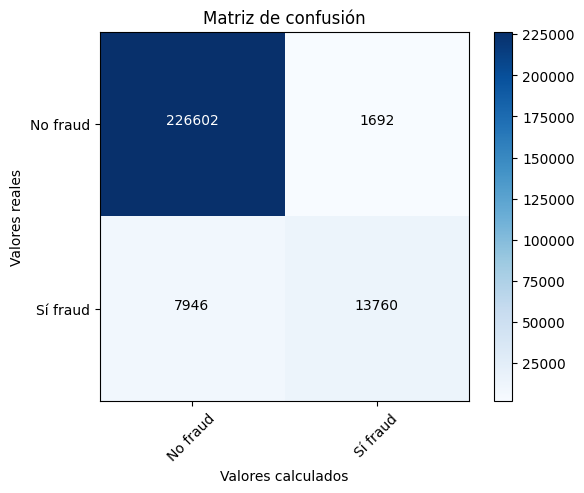

In [21]:
# Generamos el gráfico llamando la función que creamos y enviando los parámetros
# cm = nuestra matriz de confusión (conf_fraud)
# classes = las clases a predecir (si es un fraude o no)
plot_cm(conf_fraud, ['No fraud', 'Sí fraud'])

Segun el grafico se obtuvo la siguiente conclusion:
 226602 transacciones no fraudulentas y nuestro modelo dijo que no eran un fraude
 1692 transacciones no fraudulentas y nuestro modelo dijo que si eran un fraude(error en modelo)
 7946 transacciones fraudulentas y nuestro modelo dijo que no eran un fraude(error en modelo)
 13760 transacciones fraudulentas y nuestro modelo dijo que si eran un fraude

 Por lo que podemos concluir que nuestro modelo es muy bueno calculando transacciones no fraudulentas. Por supuesto debido a que la mayoria de los datos corresponden a transacciones no fraudulentas.